### Libraries

In [3]:
from datetime import datetime
import time
import pandas as pd
import matplotlib.pyplot as plt

### Welcome Messege

In [4]:
print('\nHello! Let\'s explore some STC JAWWY TV data!\n')


Hello! Let's explore some STC JAWWY TV data!



### Loading Data

In [5]:
# load data file into a dataframe
df = pd.read_csv('STC_Jawwy_TV.csv')

### Drop Columns

In [6]:
df.drop(['Column1', 'program_desc', 'original_name'], axis = 1, inplace = True)

### Duplicates

In [7]:
df.duplicated
df = df.drop_duplicates()
df.shape

(946192, 10)

### Rename Columns

In [8]:
df = df.rename(columns={"date_":"Date","user_id_maped":"User ID","program_name":"Program Name","duration_seconds":"Duration Seconds","program_class":"Type",
"season":"Season","episode":"Episode","program_genre":"Genre","series_title":"Series Title","hd":"HD"})

### Set Time

In [9]:
df['Date'] = df['Date'].apply(lambda val: datetime.strptime(val, "%m/%d/%Y"))

### EDA

In [10]:
print(df.head())
nan_count = df.isna().sum().sum()
print('NaN Values = ',nan_count)
print('Shipe is ',df.shape)
print(df.dtypes)
df.duplicated


        Date  User ID           Program Name  Duration Seconds   Type  Season  \
0 2017-05-27    26138             100 treets                40  MOVIE       0   
1 2017-05-21     7946                 Moana                 17  MOVIE       0   
2 2017-08-10     7418  The Mermaid Princess                  8  MOVIE       0   
3 2017-07-26    19307  The Mermaid Princess                 76  MOVIE       0   
4 2017-07-07    15860             Churchill                 87  MOVIE       0   

   Episode      Genre  Series Title  HD  
0        0      Drama             0   0  
1        0  Animation             0   1  
2        0  Animation             0   1  
3        0  Animation             0   1  
4        0  Biography             0   1  
NaN Values =  0
Shipe is  (946192, 10)
Date                datetime64[ns]
User ID                      int64
Program Name                object
Duration Seconds             int64
Type                        object
Season                       int64
Episode     

<bound method DataFrame.duplicated of               Date  User ID                                     Program Name  \
0       2017-05-27    26138                                       100 treets   
1       2017-05-21     7946                                           Moana    
2       2017-08-10     7418                            The Mermaid Princess    
3       2017-07-26    19307                            The Mermaid Princess    
4       2017-07-07    15860                                       Churchill    
...            ...      ...                                              ...   
1048570 2017-04-22    23716                                 Extraterrestrial   
1048571 2017-11-29     1776  Friends     The One With The Holiday Armadillo    
1048572 2017-06-15     1918     Masters of Horror  Dreams In The Witch House   
1048573 2017-09-11    25737                           Two Lovers and a Bear    
1048574 2017-05-02    19844                                 American Psycho    

 

## Top 5 Categories TV shows in Number of Content 

In [34]:
cat_5 = df.groupby('Genre')['Type'].apply(lambda x: (x=='SERIES/EPISODES').sum()).reset_index(name='count')
cat_5 = cat_5.sort_values(by='count', ascending=False)
cat_5.head(5)



,Genre,count
2,Animation,248225
7,Drama,103280
4,Comedy,67132
0,Action,61727
9,Horror,34881


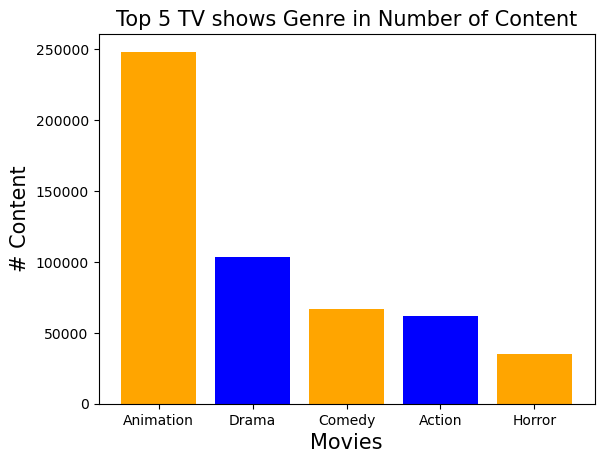

In [44]:
Genre = ['Animation', 'Drama', 'Comedy', 'Action', 'Horror']
count  = [248225, 103280, 67132, 61727, 34881]
colors = ['orange','blue']

plt.bar(Genre, count, color= colors)
plt.title('Top 5 TV shows Genre in Number of Content',fontsize = 15)
plt.xlabel('Movies',fontsize = 15)
plt.ylabel('# Content',fontsize = 15)

plt.show()